# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.093072e+01     8.254006e+00
 * time: 0.005084991455078125
     1     2.849806e+01     6.516984e+00
 * time: 0.014858007431030273
     2     2.277824e+01     5.726305e+00
 * time: 0.03799700736999512
     3     1.411687e+01     2.696847e+00
 * time: 0.0657510757446289
     4     1.150397e+01     1.413490e+00
 * time: 0.08895397186279297
     5     1.070247e+01     7.490919e-01
 * time: 0.11200714111328125
     6     1.020105e+01     1.656222e+00
 * time: 0.1305389404296875
     7     9.787535e+00     7.415284e-01
 * time: 0.14904308319091797
     8     9.506071e+00     4.863530e-01
 * time: 0.16804003715515137
     9     9.386617e+00     3.831472e-01
 * time: 0.18674397468566895
    10     9.364121e+00     5.326263e-01
 * time: 0.20094609260559082
    11     9.352074e+00     4.059317e-01
 * time: 0.21530699729919434
    12     9.345523e+00     6.798616e-01
 * time: 0.229417085647583
    13     9.314122e+00     3.714607e-01
 * time: 0

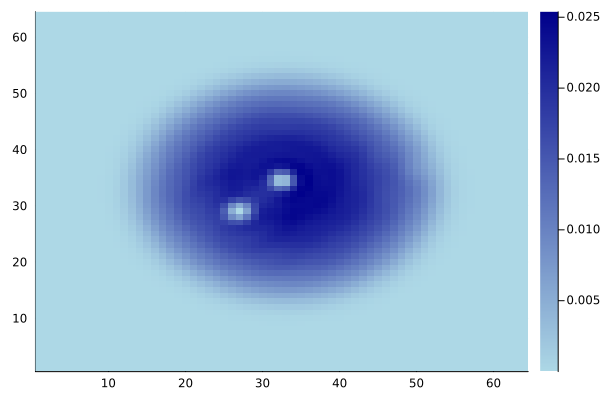

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)